In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
x = [21.8,10.3,14.9,24.8,18.7,4.9,20.7,15,14.2,20,24.7,20.5,21.6,22.2,1.8,24.9,12.3,6.6,4.7,10.8,15.8,3.4,19.8,10.4,6.8,0.5,0.3,14.8,19.2,1,12,18.7,16.7,20.7,23.6,12.6,4.2,16.6,17.4,22,2.5,18.2,13,12.2,10,2.3,14.2,11.2,20,19.9,18.7,5.4,18.7,4.9,7.3,15.3,23.8,13.8,1.1,4.5,18.8,0.7,15.6,8.1,11.7,8.7,15.5,2.5,24.3,8.6,2.3,13.2,6.2,2,14,2.3,0.5,5.1,10.2,6.4,16.5,23.7,1.1,10.6,15.8,19,15.9,9.2,22.4,4.2,24.4,23.8,17.6,14.1,22,6.4,17.3,20.2,1.4,24.9]
y = [324.5,287.3,300.9,336.7,315.7,270.6,319.7,306.4,301.8,316.5,337.2,323.4,322.3,325.7,262.5,338.9,295.1,275.2,272,290.2,307.2,266.3,321.2,291.2,277.2,257,256,300.6,317.1,259.3,294.6,319.3,311.9,322.3,331.2,298.1,269.3,309.5,312.8,326,264.1,311.3,294.3,296.7,288.2,262.6,302,290.9,320.2,321.4,315,273.2,312.9,270.7,278.5,306.6,329.6,301.3,260.4,270.8,313.2,257.5,304.6,280.8,293.4,285,305.2,263.4,338,282.8,263.5,297.2,276,263.2,299.1,264.5,257.3,272.7,286.6,276.6,308.4,334.3,259.1,287.9,307.9,316.9,305.6,284.4,328.5,269,334.2,330.9,314.3,301.5,326.4,277.7,312.6,322.6,260.1,337.3]

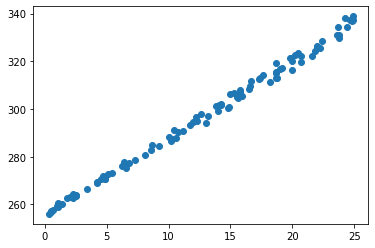

In [6]:
plt.scatter(x, y, label="input data set")

In [7]:
# 선형 모델 클래스 
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(0.)
        self.Bias = tf.Variable(0.)

In [8]:
# 오차(손실) 구하기 함수
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

In [9]:
# 학습 함수
def train(linear_model, x, y, lr):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

In [10]:
# 학습 진행
linear_model = LinearModel()
epochs = 10000

for epoch_count in range(epochs + 1):
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.003)
    if epoch_count % 100 == 0:
        print(f"{epoch_count}:: W:{linear_model.Weight.numpy()} b:{linear_model.Bias.numpy()} Loss: {real_loss.numpy()} ")

0:: W:24.2144718170166 b:1.7844960689544678 Loss: 89042.0703125 
100:: W:15.894939422607422 b:36.794334411621094 Loss: 12027.91796875 
200:: W:14.131817817687988 b:67.24498748779297 Loss: 8913.95703125 
300:: W:12.614044189453125 b:93.45829772949219 Loss: 6606.33984375 
400:: W:11.307474136352539 b:116.02391052246094 Loss: 4896.26806640625 
500:: W:10.182718276977539 b:135.44944763183594 Loss: 3629.009033203125 
600:: W:9.214475631713867 b:152.17185974121094 Loss: 2689.8974609375 
700:: W:8.38097095489502 b:166.5672149658203 Loss: 1993.9681396484375 
800:: W:7.663455963134766 b:178.95933532714844 Loss: 1478.24755859375 
900:: W:7.045782089233398 b:189.62710571289062 Loss: 1096.067138671875 
1000:: W:6.51406192779541 b:198.81039428710938 Loss: 812.851318359375 
1100:: W:6.056325912475586 b:206.7158966064453 Loss: 602.9695434570312 
1200:: W:5.662293910980225 b:213.52117919921875 Loss: 447.4388427734375 
1300:: W:5.323092460632324 b:219.37948608398438 Loss: 332.1817932128906 
1400:: W:5.